In [1]:
# Run this cell only once if libraries are not installed
!pip install numpy pandas matplotlib seaborn scipy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import sys
sys.path.append('..')

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Load Results Data

In [3]:
results_dir = Path('../results')

results_files = {
    'grid_mnist': 'grid_mnist_20251021_011057.json',
    'grid_cifar10': 'grid_cifar10_20251021_050052.json',
    'random_mnist': 'random_mnist_20251021_010819.json',
    'random_cifar10': 'random_cifar10_20251021_041728.json',
    'ga_mnist': 'ga_mnist_20251021_101942.json',
    'ga_cifar10': 'ga_cifar10_20251022_073914.json',
    'pso_mnist': 'pso_mnist_20251021_181551.json',
    'pso_cifar10': 'pso_cifar10_20251022_164435.json',
    'de_mnist': 'de_mnist_20251021_152823.json',
    'de_cifar10': 'de_cifar10_20251022_210512.json'
}

data = {}
for key, filename in results_files.items():
    filepath = results_dir / filename
    with open(filepath) as f:
        data[key] = json.load(f)

print(f"Loaded {len(data)} result files")

Loaded 10 result files


## Figure 1: Experimental Workflow

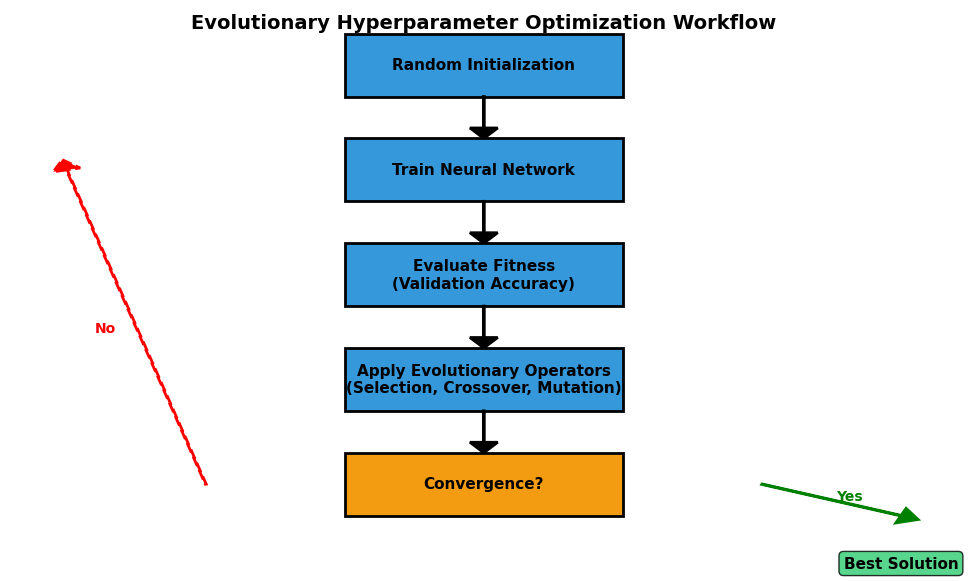

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

steps = [
    'Random Initialization',
    'Train Neural Network',
    'Evaluate Fitness\n(Validation Accuracy)',
    'Apply Evolutionary Operators\n(Selection, Crossover, Mutation)',
    'Convergence?'
]

y_positions = [0.85, 0.65, 0.45, 0.25, 0.05]
box_height = 0.12

for i, (step, y) in enumerate(zip(steps, y_positions)):
    if i == 4:
        ax.add_patch(plt.Rectangle((0.35, y), 0.3, box_height, 
                                   facecolor='#f39c12', edgecolor='black', linewidth=2))
    else:
        ax.add_patch(plt.Rectangle((0.35, y), 0.3, box_height, 
                                   facecolor='#3498db', edgecolor='black', linewidth=2))
    ax.text(0.5, y + box_height/2, step, ha='center', va='center', 
            fontsize=11, fontweight='bold')
    
    if i < len(steps) - 1:
        ax.arrow(0.5, y, 0, -0.06, head_width=0.03, head_length=0.02, 
                fc='black', ec='black', linewidth=2)

ax.arrow(0.2, 0.11, -0.15, 0.6, head_width=0.03, head_length=0.02,
        fc='red', ec='red', linewidth=2, linestyle='--')
ax.text(0.08, 0.4, 'No', fontsize=10, fontweight='bold', color='red')

ax.arrow(0.8, 0.11, 0.15, -0.06, head_width=0.03, head_length=0.02,
        fc='green', ec='green', linewidth=2)
ax.text(0.88, 0.08, 'Yes', fontsize=10, fontweight='bold', color='green')

ax.text(0.95, -0.05, 'Best Solution', ha='center', fontsize=11, 
        fontweight='bold', bbox=dict(boxstyle='round', facecolor='#2ecc71', alpha=0.8))

ax.text(0.5, 0.98, 'Evolutionary Hyperparameter Optimization Workflow', 
        ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../figures/figure1_workflow.png', dpi=300, bbox_inches='tight')
plt.show()

## Figure 2: Performance Comparison

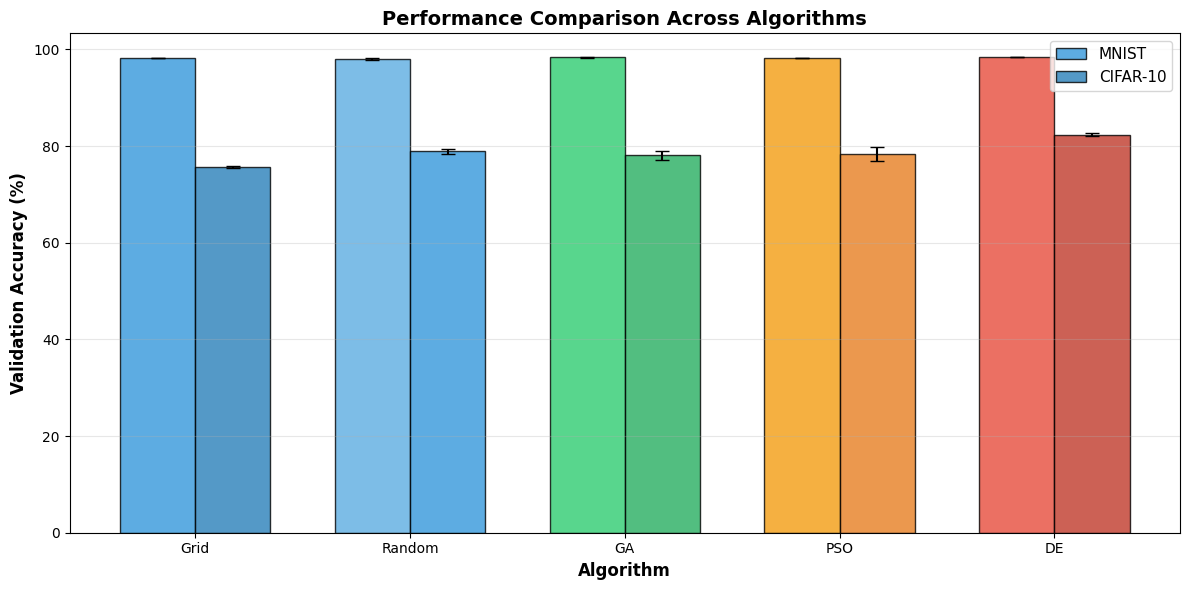

MNIST Results:
  Grid: 98.26% ± 0.02%
  Random: 98.06% ± 0.23%
  GA: 98.32% ± 0.02%
  PSO: 98.23% ± 0.07%
  DE: 98.39% ± 0.01%

CIFAR-10 Results:
  Grid: 75.69% ± 0.16%
  Random: 78.89% ± 0.58%
  GA: 78.08% ± 0.96%
  PSO: 78.41% ± 1.48%
  DE: 82.35% ± 0.32%


In [5]:
algorithms = ['Grid', 'Random', 'GA', 'PSO', 'DE']

mnist_means = []
mnist_stds = []
cifar10_means = []
cifar10_stds = []

for algo in algorithms:
    mnist_key = f"{algo.lower()}_mnist"
    cifar10_key = f"{algo.lower()}_cifar10"
    
    mnist_accuracies = [run['best_fitness'] for run in data[mnist_key]['runs']]
    cifar10_accuracies = [run['best_fitness'] for run in data[cifar10_key]['runs']]
    
    mnist_means.append(np.mean(mnist_accuracies))
    mnist_stds.append(np.std(mnist_accuracies))
    cifar10_means.append(np.mean(cifar10_accuracies))
    cifar10_stds.append(np.std(cifar10_accuracies))

x = np.arange(len(algorithms))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

colors_mnist = ['#3498db', '#5dade2', '#2ecc71', '#f39c12', '#e74c3c']
colors_cifar = ['#2980b9', '#3498db', '#27ae60', '#e67e22', '#c0392b']

bars1 = ax.bar(x - width/2, mnist_means, width, yerr=mnist_stds, 
               label='MNIST', color=colors_mnist, capsize=5, alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, cifar10_means, width, yerr=cifar10_stds,
               label='CIFAR-10', color=colors_cifar, capsize=5, alpha=0.8, edgecolor='black')

ax.set_xlabel('Algorithm', fontweight='bold', fontsize=12)
ax.set_ylabel('Validation Accuracy (%)', fontweight='bold', fontsize=12)
ax.set_title('Performance Comparison Across Algorithms', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/figure2_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("MNIST Results:")
for algo, mean, std in zip(algorithms, mnist_means, mnist_stds):
    print(f"  {algo}: {mean:.2f}% ± {std:.2f}%")

print("\nCIFAR-10 Results:")
for algo, mean, std in zip(algorithms, cifar10_means, cifar10_stds):
    print(f"  {algo}: {mean:.2f}% ± {std:.2f}%")

## Figure 3: Convergence Curves

In [12]:
print("Checking data structure:")
print(f"GA MNIST run keys: {list(data['ga_mnist']['runs'][0].keys())}")
print(f"\nFirst history item: {data['ga_mnist']['runs'][0]['evaluation_history'][0]}")

Checking data structure:
GA MNIST run keys: ['run', 'best_fitness', 'best_hyperparameters', 'evaluation_history', 'total_evaluations', 'time_seconds']

First history item: {'evaluation': 1, 'hyperparameters': {'learning_rate': 0.00917089742216361, 'batch_size': 256, 'dropout_rate': 0.040241803721382585, 'hidden_units': 256, 'optimizer': 'sgd', 'weight_decay': 0.0068373977364520845, '_training_results': {'final_val_accuracy': 98.08333333333333, 'final_val_loss': 0.09189941646887902, 'best_val_accuracy': 98.31666666666666, 'best_val_loss': 0.08547736450712731, 'total_epochs': 50, 'total_training_time': 224.24641489982605, 'average_epoch_time': 4.484824204444886, 'converged': False, 'history': {'train_loss': [0.47458484174406274, 0.2132126841139286, 0.1693184899681426, 0.14281005630309276, 0.12651782732536185, 0.11381959701155095, 0.10341443539537648, 0.09705519636577749, 0.08913290910819109, 0.08339150352997983, 0.07974849254923298, 0.0763256458684485, 0.07232969085824617, 0.069457252490

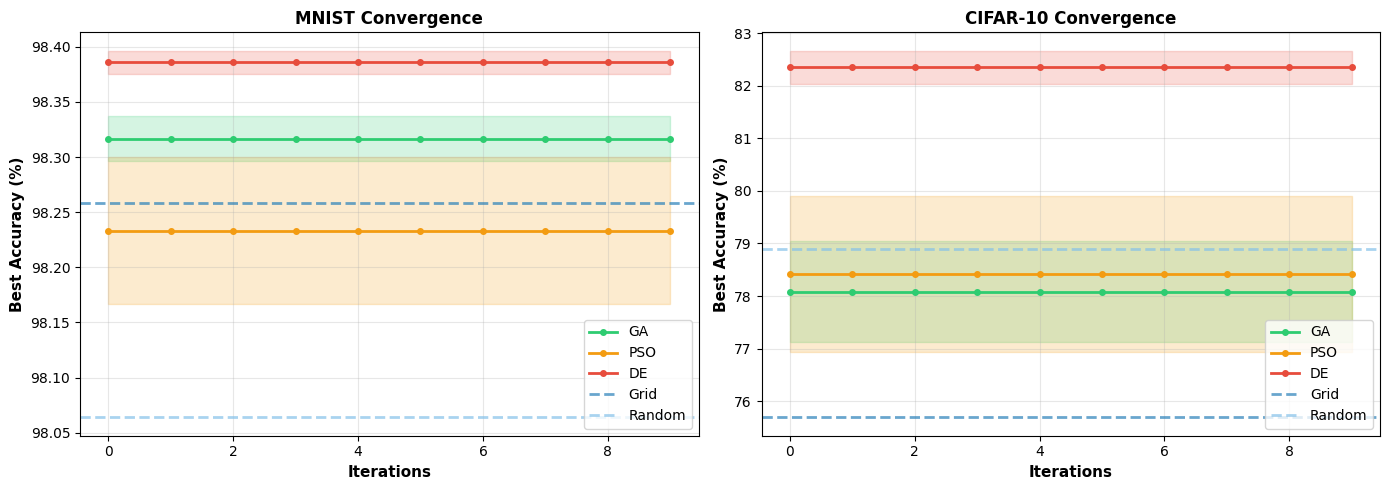

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

colors = {'Grid': '#2980b9', 'Random': '#85c1e9', 'GA': '#2ecc71', 
          'PSO': '#f39c12', 'DE': '#e74c3c'}

for dataset, ax, title in [('mnist', ax1, 'MNIST'), ('cifar10', ax2, 'CIFAR-10')]:
    
    for algo in ['GA', 'PSO', 'DE']:
        key = f"{algo.lower()}_{dataset}"
        
        all_histories = []
        for run in data[key]['runs']:
            history = [eval_dict['fitness'] for eval_dict in run['evaluation_history']]
            all_histories.append(history)
        
        history_array = np.array(all_histories)
        mean_history = np.mean(history_array, axis=0)
        std_history = np.std(history_array, axis=0)
        
        iterations = np.arange(len(mean_history))
        ax.plot(iterations, mean_history, marker='o', label=algo, 
                color=colors[algo], linewidth=2, markersize=4)
        ax.fill_between(iterations, mean_history - std_history, 
                        mean_history + std_history, alpha=0.2, color=colors[algo])
    
    for algo in ['Grid', 'Random']:
        key = f"{algo.lower()}_{dataset}"
        accuracies = [run['best_fitness'] for run in data[key]['runs']]
        mean_acc = np.mean(accuracies)
        
        ax.axhline(y=mean_acc, color=colors[algo], linestyle='--', 
                   linewidth=2, label=algo, alpha=0.7)
    
    ax.set_xlabel('Iterations', fontweight='bold', fontsize=11)
    ax.set_ylabel('Best Accuracy (%)', fontweight='bold', fontsize=11)
    ax.set_title(f'{title} Convergence', fontweight='bold', fontsize=12)
    ax.legend(loc='lower right', fontsize=10)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/figure3_convergence.png', dpi=300, bbox_inches='tight')
plt.show()

## Figure 4: Distribution Analysis (Box Plots)

/var/folders/nw/wk97mvvj16gcm9ps3pxjs5z40000gn/T/ipykernel_60101/2579203414.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax1.boxplot(mnist_data_list, labels=algorithms, patch_artist=True,
/var/folders/nw/wk97mvvj16gcm9ps3pxjs5z40000gn/T/ipykernel_60101/2579203414.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax2.boxplot(cifar10_data_list, labels=algorithms, patch_artist=True,


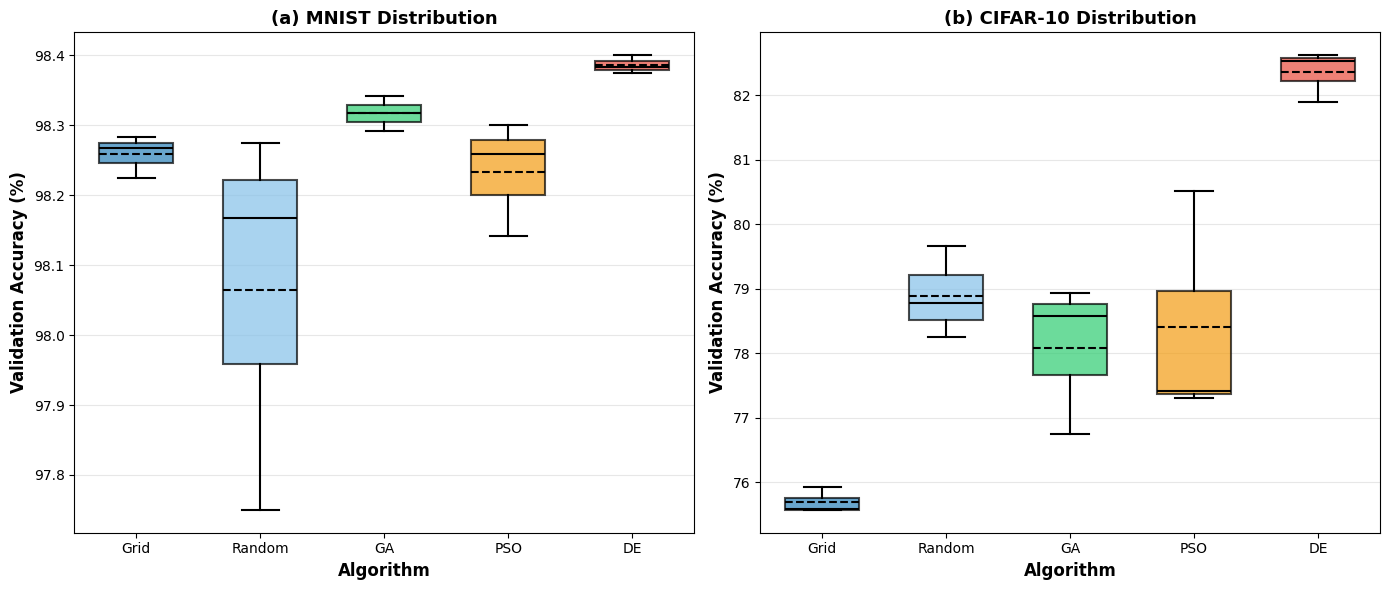

Variance Analysis (Standard Deviation):

MNIST:
  Grid: σ = 0.025%
  Random: σ = 0.226%
  GA: σ = 0.020%
  PSO: σ = 0.067%
  DE: σ = 0.010%

CIFAR-10:
  Grid: σ = 0.163%
  Random: σ = 0.582%
  GA: σ = 0.961%
  PSO: σ = 1.483%
  DE: σ = 0.320%


In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

algorithms = ['Grid', 'Random', 'GA', 'PSO', 'DE']
colors = {'Grid': '#2980b9', 'Random': '#85c1e9', 'GA': '#2ecc71', 
          'PSO': '#f39c12', 'DE': '#e74c3c'}

# MNIST box plots
mnist_data_list = []
for algo in algorithms:
    key = f"{algo.lower()}_mnist"
    accuracies = [run['best_fitness'] for run in data[key]['runs']]
    mnist_data_list.append(accuracies)

bp1 = ax1.boxplot(mnist_data_list, labels=algorithms, patch_artist=True,
                  showmeans=True, meanline=True, widths=0.6)

for patch, algo in zip(bp1['boxes'], algorithms):
    patch.set_facecolor(colors[algo])
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp1[element], color='black', linewidth=1.5)

ax1.set_ylabel('Validation Accuracy (%)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Algorithm', fontweight='bold', fontsize=12)
ax1.set_title('(a) MNIST Distribution', fontweight='bold', fontsize=13)
ax1.grid(axis='y', alpha=0.3)

# CIFAR-10 box plots
cifar10_data_list = []
for algo in algorithms:
    key = f"{algo.lower()}_cifar10"
    accuracies = [run['best_fitness'] for run in data[key]['runs']]
    cifar10_data_list.append(accuracies)

bp2 = ax2.boxplot(cifar10_data_list, labels=algorithms, patch_artist=True,
                  showmeans=True, meanline=True, widths=0.6)

for patch, algo in zip(bp2['boxes'], algorithms):
    patch.set_facecolor(colors[algo])
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp2[element], color='black', linewidth=1.5)

ax2.set_ylabel('Validation Accuracy (%)', fontweight='bold', fontsize=12)
ax2.set_xlabel('Algorithm', fontweight='bold', fontsize=12)
ax2.set_title('(b) CIFAR-10 Distribution', fontweight='bold', fontsize=13)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/figure4_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# Print variance analysis
print("Variance Analysis (Standard Deviation):")
print("\nMNIST:")
for algo, acc_data in zip(algorithms, mnist_data_list):
    print(f"  {algo}: σ = {np.std(acc_data):.3f}%")

print("\nCIFAR-10:")
for algo, acc_data in zip(algorithms, cifar10_data_list):
    print(f"  {algo}: σ = {np.std(acc_data):.3f}%")